# TCC - Gi Folle

### Dados utilizados

<< Descrição de onde veio o dataset, etc >>

Os dados brutos foram colocados em uma planilha única contendo 10 linhas (anos 2014-2023) e 50 colunas, contendo informações de: Sexo, Faixa Etária, Escolaridade, Etnia, Estado civil, Local da Ocorrência e o Mês da ocorrência.  



#### Pacotes utilizados e explicação dos pacotes

In [2]:
%pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chisquare, ttest_ind, f_oneway, kruskal
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

# Observação:
# pandas: Utilizado para manipulação e análise de dados, criação de DataFrames e Séries.
# numpy: Utilizado para operações matemáticas e manipulação de arrays.
# matplotlib.pyplot: Utilizado para criação de gráficos e visualizações.
# seaborn: Utilizado para criação de gráficos estatísticos e visualizações avançadas.
# scipy.stats: Utilizado para testes estatísticos, como o teste Qui-quadrado e ANOVA.
# sklearn.cluster: Utilizado para algoritmos de clusterização, como KMeans.
# sklearn.decomposition: Utilizado para decomposição de dados, como PCA (Análise de Componentes Principais).
# sklearn.preprocessing: Utilizado para pré-processamento de dados, como normalização.
# statsmodels.tsa.arima.model: Utilizado para modelagem de séries temporais, como ARIMA.

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 991.0 kB/s eta 0:00:10
    --------------------------------------- 0.2/9.9 MB 3.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.9 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.9 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.9 MB 4.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.9 MB 4.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.9 MB 4.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/9.9 MB 4.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.9 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/9.9 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.9 MB 5.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 5.3 MB/s eta 0:00:02
   ------------ -


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\FOKO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Abrir documento formato csv

In [5]:
df = pd.read_csv('G:/Meu Drive/Trabalho_Gi_Folle/dados_brutos.csv', sep= ';', encoding = 'UTF8')

Visualização geral dos dados

In [146]:
df.head(10)

,ano,Sexo_Masculino,Sexo_Feminino,Sexo_Ignorado,FaixaEtaria_10_14,FaixaEtaria_15_19,FaixaEtaria_20_29,FaixaEtaria_30_39,FaixaEtaria_40_49,FaixaEtaria_50_59,...,Mes_obito_Março,Mes_obito_Abril,Mes_obito_Maio,Mes_obito_Junho,Mes_obito_Julho,Mes_obito_Agosto,Mes_obito_Setembro,Mes_obito_Outubro,Mes_obito_Novembro,Mes_obito_Dezembro
0,2014,513,113,0,7,46,135,112,131,91,...,51,71,45,43,45,51,48,56,61,54
1,2015,569,152,0,3,51,124,137,154,118,...,54,67,56,58,56,52,51,59,57,73
2,2016,641,127,0,6,41,134,171,153,129,...,55,61,64,52,63,59,61,61,73,83
3,2017,594,181,1,15,48,144,169,143,127,...,67,36,58,55,65,64,90,69,73,74
4,2018,750,168,0,10,57,178,186,189,132,...,89,84,73,72,63,59,90,70,94,87
5,2019,750,201,1,9,68,227,187,171,138,...,94,90,66,57,70,73,96,85,93,77
6,2020,744,187,1,12,51,214,177,174,144,...,73,67,78,66,73,77,85,67,96,85
7,2021,846,252,1,20,79,241,225,199,153,...,86,90,90,78,80,89,108,98,94,95
8,2022,956,225,0,14,70,246,257,218,181,...,109,99,86,91,88,99,84,104,122,119
9,2023,750,208,0,2,46,203,197,205,134,...,86,85,67,71,74,66,100,76,90,87


Avaliação dos nomes das colunas

In [7]:
df.columns

Index(['ano', 'Sexo_Masculino', 'Sexo_Feminino', 'Sexo_Ignorado',
       'FaixaEtaria_10_14', 'FaixaEtaria_15_19', 'FaixaEtaria_20_29',
       'FaixaEtaria_30_39', 'FaixaEtaria_40_49', 'FaixaEtaria_50_59',
       'FaixaEtaria_60_69', 'FaixaEtaria_70_79 ', 'FaixaEtaria_8O',
       'FaixaEtaria_Ignorada', 'Escolaridade_Nenhuma', 'Escolaridade_1a3anos',
       'Escolaridade_4a7anos', 'Escolaridade_8a11anos', 'Escolaridade_12anos',
       'Escolaridade_Ignorado', 'CorRaca_Branca', 'CorRaca_Preta',
       'CorRaca_Amarela', 'CorRaca_Parda', 'CorRaca_Indigena',
       'CorRaca_Ignorado', 'Local_ocorrencia_Hospital',
       'Local_ocorrencia_Outro_estabelecimento_Saude',
       'Local_ocorrencia_Domicilio', 'Local_ocorrencia_Via_publica',
       'Local_ocorrencia_Outros', 'Local_ocorrencia_Ignorado',
       'EstadoCivil_Solteiro', 'EstadoCivil_Casado', 'EstadoCivil_Viuvo',
       'EstadoCivil_Separado', 'EstadoCivil_Outro', 'EstadoCivil_Ignorado',
       'Mes_obito_Janeiro', 'Mes_obito_Fevere

####  Alteração de limpeza necessária:

Criação de dataframes separados por variável juntamente com a retirada das colunas "ignorado", pois possuem valores baixos que não responderam de forma relevante na análise


In [11]:
df_sexo = df[['Sexo_Masculino', 'Sexo_Feminino','Sexo_Ignorado']]
df_idade = df[['FaixaEtaria_10_14','FaixaEtaria_15_19', 'FaixaEtaria_20_29', 'FaixaEtaria_30_39', 'FaixaEtaria_40_49','FaixaEtaria_50_59','FaixaEtaria_60_69','FaixaEtaria_70_79 ', 'FaixaEtaria_8O']]
df_escolaridade = df[['Escolaridade_Nenhuma', 'Escolaridade_1a3anos','Escolaridade_4a7anos', 'Escolaridade_8a11anos', 'Escolaridade_12anos']]
df_raca = df[['CorRaca_Branca', 'CorRaca_Preta','CorRaca_Amarela', 'CorRaca_Parda', 'CorRaca_Indigena']]
df_local = df[[ 'Local_ocorrencia_Hospital','Local_ocorrencia_Outro_estabelecimento_Saude','Local_ocorrencia_Domicilio', 'Local_ocorrencia_Via_publica', 'Local_ocorrencia_Outros']]
df_estadoCivil = df[['EstadoCivil_Solteiro', 'EstadoCivil_Casado', 'EstadoCivil_Viuvo','EstadoCivil_Separado', 'EstadoCivil_Outro']]
df_mes = df[['Mes_obito_Janeiro', 'Mes_obito_Fevereiro', 'Mes_obito_Março','Mes_obito_Abril', 'Mes_obito_Maio', 'Mes_obito_Junho', 'Mes_obito_Julho', 'Mes_obito_Agosto', 'Mes_obito_Setembro', 'Mes_obito_Outubro', 'Mes_obito_Novembro', 'Mes_obito_Dezembro']]

## Análise Exploratória

A partir da análise exploratória temos parâmetros estatisticos importantes, como média, mediana, máximos e desvios padrão

#### AE - Sexo

In [12]:
df_sexo.describe()


,Sexo_Masculino,Sexo_Feminino,Sexo_Ignorado
count,10.000000,10.000000,10.000000
mean,711.300000,181.400000,0.400000
std,134.105307,43.063777,0.516398
min,513.000000,113.000000,0.000000
25%,605.750000,156.000000,0.000000
50%,747.000000,184.000000,0.000000
75%,750.000000,206.250000,1.000000
max,956.000000,252.000000,1.000000


#### AE - Idade

In [150]:
df_idade.describe()

,FaixaEtaria_10_14,FaixaEtaria_15_19,FaixaEtaria_20_29,FaixaEtaria_30_39,FaixaEtaria_40_49,FaixaEtaria_50_59,FaixaEtaria_60_69,FaixaEtaria_70_79,FaixaEtaria_8O
count,10.000000,10.00000,10.00000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000
mean,9.800000,55.70000,184.60000,181.800000,173.700000,134.7000,82.600000,48.000000,20.400000
std,5.613476,12.50822,47.53525,40.797059,28.686234,23.2477,16.520694,9.752493,8.720347
min,2.000000,41.00000,124.00000,112.000000,131.000000,91.0000,51.000000,34.000000,13.000000
25%,6.250000,46.50000,137.25000,169.500000,153.250000,127.5000,72.250000,41.750000,16.250000
50%,9.500000,51.00000,190.50000,181.500000,172.500000,133.0000,86.000000,47.500000,18.500000
75%,13.500000,65.25000,223.75000,194.500000,196.500000,142.5000,89.250000,50.250000,20.500000
max,20.000000,79.00000,246.00000,257.000000,218.000000,181.0000,111.000000,68.000000,44.000000


#### AE - Escolaridade

In [151]:
df_escolaridade.describe()

,Escolaridade_Nenhuma,Escolaridade_1a3anos,Escolaridade_4a7anos,Escolaridade_8a11anos,Escolaridade_12anos
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,24.800000,117.800000,258.300000,344.100000,112.100000
std,5.159673,7.495184,26.549953,116.951509,31.132156
min,17.000000,102.000000,228.000000,159.000000,65.000000
25%,21.000000,115.000000,240.750000,261.750000,83.000000
50%,26.000000,118.500000,248.500000,357.000000,119.500000
75%,27.000000,123.500000,278.250000,392.500000,138.500000
max,32.000000,127.000000,309.000000,540.000000,149.000000


#### AE - Etnia


In [152]:
df_raca.describe()

,CorRaca_Branca,CorRaca_Preta,CorRaca_Amarela,CorRaca_Parda,CorRaca_Indigena
count,10.000000,10.000000,10.000000,10.00000,10.000000
mean,322.200000,68.000000,137.600000,272.40000,70.500000
std,316.904051,53.537111,140.303005,178.29202,70.795872
min,19.000000,13.000000,2.000000,92.00000,2.000000
25%,27.500000,19.250000,5.500000,106.50000,3.500000
50%,271.500000,61.000000,126.500000,256.00000,63.000000
75%,610.250000,121.250000,258.500000,392.50000,138.500000
max,735.000000,125.000000,309.000000,540.00000,149.000000


#### AE - Local Ocorrência

In [153]:
df_local.describe()

,Local_ocorrencia_Hospital,Local_ocorrencia_Outro_estabelecimento_Saude,Local_ocorrencia_Domicilio,Local_ocorrencia_Via_publica,Local_ocorrencia_Outros
count,10.000000,10.000000,10.000000,10.000000,10.00000
mean,119.500000,18.300000,557.100000,47.200000,150.20000
std,18.512758,5.850926,112.724295,11.726513,32.05828
min,83.000000,9.000000,390.000000,31.000000,112.00000
25%,109.250000,15.000000,473.000000,39.250000,133.25000
50%,117.000000,17.500000,581.000000,45.000000,146.50000
75%,137.000000,20.000000,603.500000,57.000000,161.50000
max,140.000000,28.000000,730.000000,65.000000,221.00000


#### AE - Estado Civíl

In [154]:
df_estadoCivil.describe()

,EstadoCivil_Solteiro,EstadoCivil_Casado,EstadoCivil_Viuvo,EstadoCivil_Separado,EstadoCivil_Outro
count,10.000000,10.000000,10.000000,10.000000,10.0000
mean,452.400000,256.900000,38.600000,76.400000,40.7000
std,124.591956,32.216111,5.966574,13.566298,5.2079
min,295.000000,197.000000,31.000000,52.000000,29.0000
25%,351.000000,241.750000,35.250000,68.250000,38.2500
50%,461.000000,260.000000,37.000000,73.000000,41.5000
75%,502.000000,274.750000,41.500000,88.500000,43.7500
max,669.000000,309.000000,49.000000,96.000000,48.0000


#### AE - Mês Ocorrência

In [155]:
df_mes.describe()

,Mes_obito_Janeiro,Mes_obito_Fevereiro,Mes_obito_Março,Mes_obito_Abril,Mes_obito_Maio,Mes_obito_Junho,Mes_obito_Julho,Mes_obito_Agosto,Mes_obito_Setembro,Mes_obito_Outubro,Mes_obito_Novembro,Mes_obito_Dezembro
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,77.200000,70.800000,76.400000,75.000000,68.300000,64.300000,67.700000,68.900000,81.300000,74.50000,85.300000,83.400000
std,13.087738,18.461973,19.494729,18.463177,13.848787,14.111067,12.202459,15.730014,20.790222,16.35203,19.402463,16.774319
min,54.000000,47.000000,51.000000,36.000000,45.000000,43.000000,45.000000,51.000000,48.000000,56.00000,57.000000,54.000000
25%,71.500000,58.000000,58.000000,67.000000,59.500000,55.500000,63.000000,59.000000,66.750000,62.50000,73.000000,74.750000
50%,75.500000,66.500000,79.500000,77.500000,66.500000,62.000000,67.500000,65.000000,87.500000,69.50000,91.500000,84.000000
75%,80.000000,80.000000,88.250000,88.750000,76.750000,71.750000,73.750000,76.000000,94.500000,82.75000,94.000000,87.000000
max,100.000000,111.000000,109.000000,99.000000,90.000000,91.000000,88.000000,99.000000,108.000000,104.00000,122.000000,119.000000


## Criação de Gráficos e Análises Estatisticas


## SEXO


Gráfico de Distribuição (Barras)

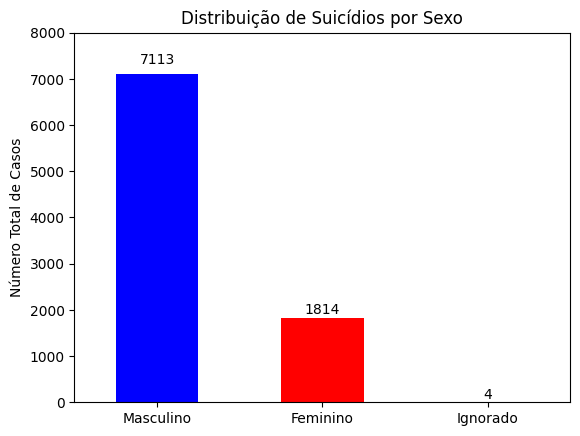

In [14]:
# Somando os valores das colunas e criando o gráfico de barras com personalizações
soma = df_sexo.sum()

# Configurações de cor, rótulos e posição
cores = ['blue', 'red','yellow']
rotulos = ['Masculino', 'Feminino','Ignorado']

# Criando o gráfico
ax = soma.plot(kind='bar', color=cores, title='Distribuição de Suicídios por Sexo')
ax.set_ylabel('Número Total de Casos')
ax.set_xticklabels(rotulos, rotation=0)

# Ajustando o limite superior do eixo Y para 8000
ax.set_ylim(0, 8000)

# Adicionando os valores acima das barras
for i, valor in enumerate(soma):
    ax.text(i, valor + (0.02 * valor), f'{int(valor)}', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()


### Avaliação estatistica

Teste t: Verifica se há diferença estatistica entre as médias dos grupos comparados (ideal por ser duas variáveis).

In [15]:
# Dados fictícios como exemplo: número de suicídios por ano
sexo_masculino = df['Sexo_Masculino']
sexo_feminino = df['Sexo_Feminino']

# Realizando o teste t para amostras independentes
stat, p_valor = ttest_ind(sexo_masculino, sexo_feminino)

# Resultados
if p_valor < 0.05:
    print(f'Diferença significativa entre os sexos! t = {stat:.2f}, p-valor = {p_valor:.4f}')
else:
    print(f'Não há diferença significativa entre os sexos. t = {stat:.2f}, p-valor = {p_valor:.4f}')


Diferença significativa entre os sexos! t = 11.90, p-valor = 0.0000


## IDADE


Gráfico de Distribuição (Barras)

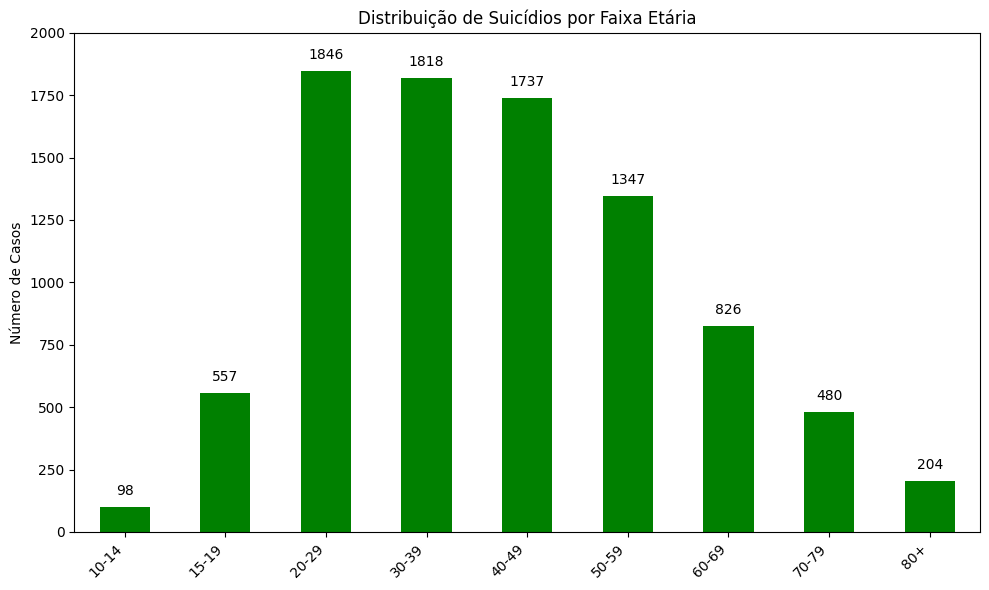

In [158]:
# Somando os valores para cada faixa etária
soma_idade = df_idade.sum()

# Configurando rótulos amigáveis para as faixas etárias
rotulos_faixas = ['10-14', '15-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Criando o gráfico de barras
ax = soma_idade.plot(kind='bar', color='green', title='Distribuição de Suicídios por Faixa Etária', figsize=(10, 6))
ax.set_xticklabels(rotulos_faixas, rotation=45, ha='right')
ax.set_ylabel('Número de Casos')

# Ajustando o limite superior do eixo Y para 2000
ax.set_ylim(0, 2000)

# Adicionando valores no topo das barras
for i, valor in enumerate(soma_idade):
    ax.text(i, valor + (0.02 * soma_idade.max()), f'{int(valor)}', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()



## Avaliação Estatistica
Teste ANOVA (Análise de Variância de Uma Via): Para avaliar diferenças significativas entre as faixas etárias.

In [159]:


# separando dados por faixas 
faixa1014 = df['FaixaEtaria_10_14']  
faixa1519 = df['FaixaEtaria_15_19']  
faixa2029 = df['FaixaEtaria_20_29']  
faixa3039 = df['FaixaEtaria_30_39'] 
faixa4049 = df['FaixaEtaria_40_49']  
faixa5059 = df['FaixaEtaria_50_59']  
faixa6069 = df['FaixaEtaria_60_69'] 
faixa7079 = df['FaixaEtaria_70_79 ']  
faixa80 = df['FaixaEtaria_8O']  


stat, p_valor = f_oneway(faixa1014, faixa1519,faixa2029,faixa3039,faixa4049,faixa5059,faixa6069,faixa7079,faixa80)

print(f'F-Estatística: {stat:.4f}, p-valor: {p_valor:.4f}')
if p_valor < 0.05:
    print("Há diferenças significativas entre as faixas etárias.")
else:
    print("Não há diferenças significativas entre as faixas etárias.")


F-Estatística: 75.8638, p-valor: 0.0000
Há diferenças significativas entre as faixas etárias.


## ESCOLARIDADE


Gráfico de Distribuição (Barras Horizontal)

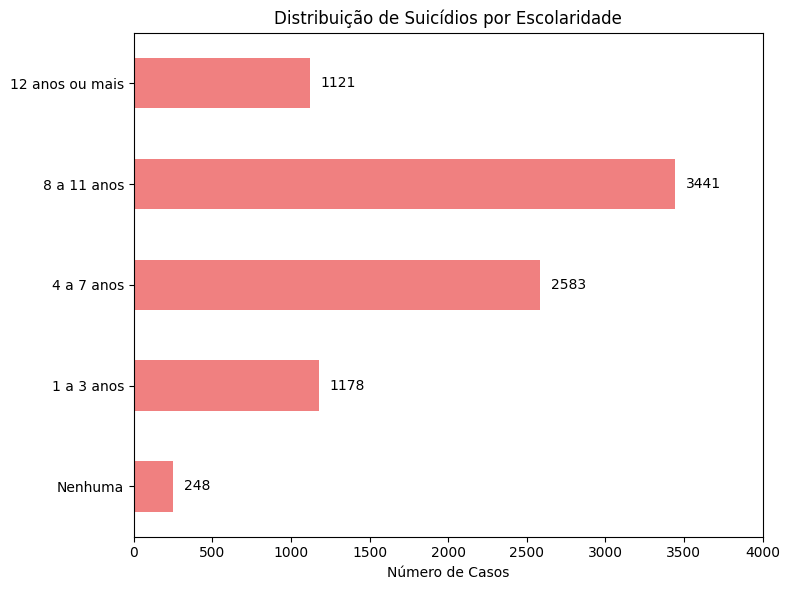

In [160]:
# Soma dos casos por nível de escolaridade
soma_escolaridade = df_escolaridade.sum()

rotulos_escolaridade = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']

# Gráfico de barras horizontal
ax = soma_escolaridade.plot(kind='barh', color='lightcoral', figsize=(8, 6), title='Distribuição de Suicídios por Escolaridade')
ax.set_xlabel('Número de Casos')
ax.set_yticklabels(rotulos_escolaridade)

# Ajustando o limite superior do eixo Y para 9000
ax.set_xlim(0, 4000)
# Adicionando valores ao lado das barras
for i, valor in enumerate(soma_escolaridade):
    ax.text(valor + (0.02 * soma_escolaridade.max()), i, f'{int(valor)}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


## Avaliação estatistica
Teste de Kruskal-Wallis:  Para avaliar diferenças significativas entre as faixas etárias. Este é o equivalente não paramétrico do ANOVA, usado para comparar mais de dois grupos.

In [161]:
# Separando dados por níveis de escolaridade
escolaridade_nenhuma = df['Escolaridade_Nenhuma']
escolaridade_1a3anos = df['Escolaridade_1a3anos']
escolaridade_4a7anos = df['Escolaridade_4a7anos']
escolaridade_8a11anos = df['Escolaridade_8a11anos']
escolaridade_12anos = df['Escolaridade_12anos']

# Realizando o teste de Kruskal-Wallis para comparar os níveis de escolaridade
stat, p_valor = kruskal(escolaridade_nenhuma, escolaridade_1a3anos, escolaridade_4a7anos, escolaridade_8a11anos, escolaridade_12anos)

print(f'F-Estatística: {stat:.4f}, p-valor: {p_valor:.4f}')
if p_valor < 0.05:
    print("Há diferenças significativas entre os níveis de escolaridade.")
else:
    print("Não há diferenças significativas entre os níveis de escolaridade.")

F-Estatística: 42.9095, p-valor: 0.0000
Há diferenças significativas entre os níveis de escolaridade.


## ETNIA / RAÇA

Gráfico de Distribuição (Barras)

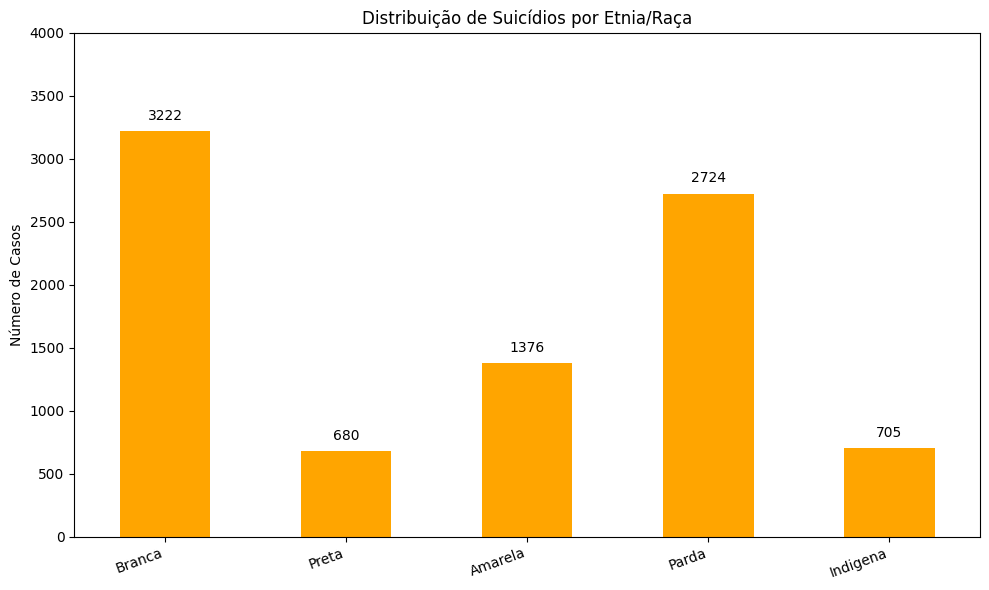

In [162]:
# Somando os valores para cada faixa etária
soma_raca = df_raca.sum()

# Configurando rótulos amigáveis para as faixas etárias
rotulos_faixas = ['Branca', 'Preta', 'Amarela', 'Parda', 'Indigena']

# Criando o gráfico de barras
ax = soma_raca.plot(kind='bar', color='orange', title='Distribuição de Suicídios por Etnia/Raça', figsize=(10, 6))
ax.set_xticklabels(rotulos_faixas, rotation=20, ha='right')
ax.set_ylabel('Número de Casos')
# Ajustando o limite superior do eixo Y
ax.set_ylim(0, 4000)

# Adicionando valores no topo das barras
for i, valor in enumerate(soma_raca):
    ax.text(i, valor + (0.02 * soma_raca.max()), f'{int(valor)}', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()



## Avaliação estatistica
Teste de Kruskal-Wallis:  Para avaliar diferenças significativas entre as diferentes etnias. Este é o equivalente não paramétrico do ANOVA, usado para comparar mais de dois grupos.

In [163]:
# Separando dados por raça
branca = df['CorRaca_Branca']
preta = df['CorRaca_Preta']
amarela = df['CorRaca_Amarela']
parda = df['CorRaca_Parda']
indigena = df['CorRaca_Indigena']

# Realizando o teste kruskal-wallis
stat, p_valor = kruskal(branca, preta, amarela, parda, indigena)

# Resultados
print(f'Estatística de Kruskal-Wallis: {stat:.4f}, p-valor: {p_valor:.4f}')
if p_valor < 0.05:
    print("Há diferenças significativas entre as raças.")
else:
    print("Não há diferenças significativas entre as raças")




Estatística de Kruskal-Wallis: 10.1698, p-valor: 0.0377
Há diferenças significativas entre as raças.


## LOCAL OCORRÊNCIA

Gráfico de Distribuição (Barras)

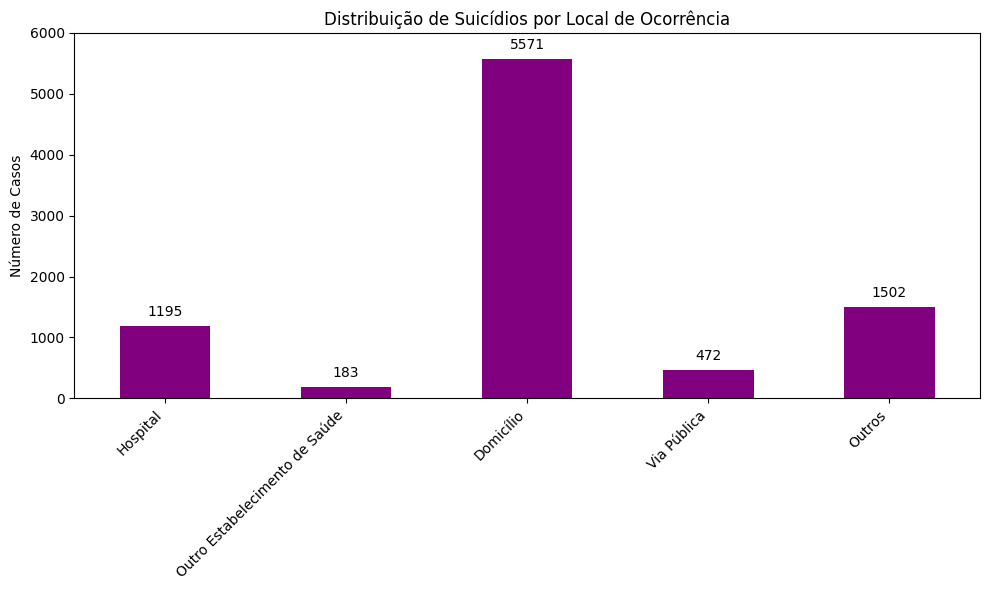

In [164]:
# Somando os valores para cada local de ocorrência
soma_local = df_local.sum()

# Configurando rótulos amigáveis para os locais de ocorrência
rotulos_locais = ['Hospital', 'Outro Estabelecimento de Saúde', 'Domicílio', 'Via Pública', 'Outros']

# Criando o gráfico de barras
ax = soma_local.plot(kind='bar', color='purple', title='Distribuição de Suicídios por Local de Ocorrência', figsize=(10, 6))
ax.set_xticklabels(rotulos_locais, rotation=45, ha='right')
ax.set_ylabel('Número de Casos')
# Ajustando o limite superior do eixo Y
ax.set_ylim(0, 6000)

# Adicionando valores no topo das barras
for i, valor in enumerate(soma_local):
    ax.text(i, valor + (0.02 * soma_local.max()), f'{int(valor)}', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Avaliação Estatistica
Usando teste de Kruskal-Wallis para avaliar se há diferença estatistica entre os grupos

In [165]:
# Separando dados por local de ocorrência
hospital = df['Local_ocorrencia_Hospital']
outro_estabelecimento = df['Local_ocorrencia_Outro_estabelecimento_Saude']
domicilio = df['Local_ocorrencia_Domicilio']
via_publica = df['Local_ocorrencia_Via_publica']
outros = df['Local_ocorrencia_Outros']

# Realizando o teste kruskal-wallis
stat, p_valor = kruskal(hospital, outro_estabelecimento, domicilio, via_publica, outros)

# Resultados
print(f'Estatística de Kruskal-Wallis: {stat:.4f}, p-valor: {p_valor:.4f}')
if p_valor < 0.05:
    print("Há diferenças significativas entre os locais de ocorrência.")
else:
    print("Não há diferenças significativas entre os locais de ocorrência.")
    

Estatística de Kruskal-Wallis: 45.5967, p-valor: 0.0000
Há diferenças significativas entre os locais de ocorrência.


## ESTADO CÍVIL


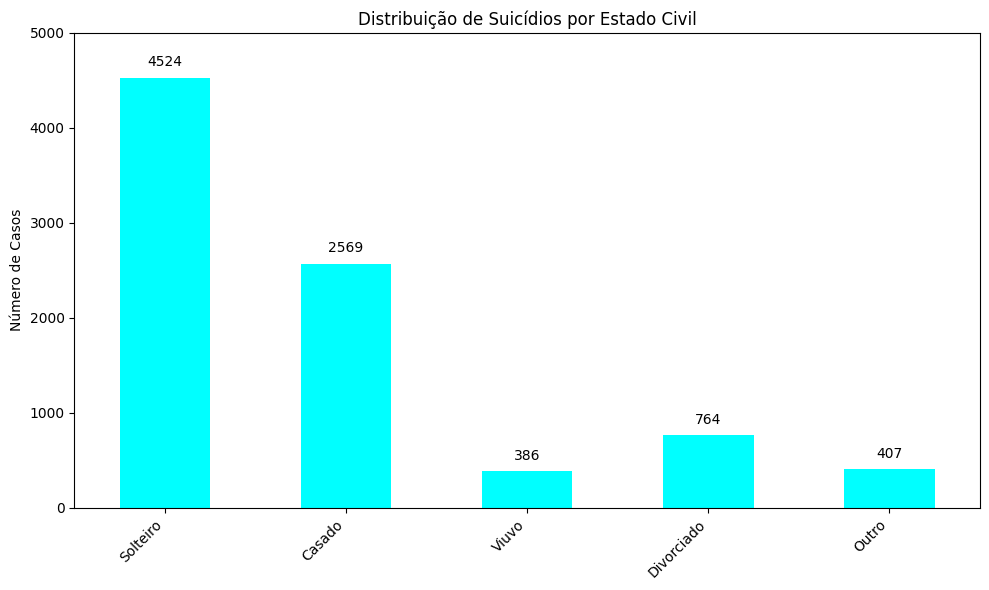

In [166]:
# Somando os valores para cada estado civil
soma_estadoCivil = df_estadoCivil.sum()

# Configurando rótulos amigáveis para os estados civis
rotulos_estadoCivil = ['Solteiro', 'Casado', 'Viuvo', 'Divorciado', 'Outro']

# Criando o gráfico de barras
ax = soma_estadoCivil.plot(kind='bar', color='cyan', title='Distribuição de Suicídios por Estado Civil', figsize=(10, 6))
ax.set_xticklabels(rotulos_estadoCivil, rotation=45, ha='right')
ax.set_ylabel('Número de Casos')
# Ajustando o limite superior do eixo Y
ax.set_ylim(0, 5000)

# Adicionando valores no topo das barras
for i, valor in enumerate(soma_estadoCivil):
    ax.text(i, valor + (0.02 * soma_estadoCivil.max()), f'{int(valor)}', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Avaliação Estatistica

In [167]:
# Separando os dados por estado civil
solteiro = df_estadoCivil['EstadoCivil_Solteiro']
casado = df_estadoCivil['EstadoCivil_Casado']
viuvo = df_estadoCivil['EstadoCivil_Viuvo']
divorciado = df_estadoCivil['EstadoCivil_Separado']
outro = df_estadoCivil['EstadoCivil_Outro']

# Realizando o teste de Kruskal-Wallis para comparar os estados civis
stat, p_valor = kruskal(solteiro, casado, viuvo, divorciado, outro)

print(f'F-Estatística: {stat:.4f}, p-valor: {p_valor:.4f}')
if p_valor < 0.05:
    print("Há diferenças significativas entre os estados civis.")
else:
    print("Não há diferenças significativas entre os estados civis.")


F-Estatística: 44.8278, p-valor: 0.0000
Há diferenças significativas entre os estados civis.


## Avaliação Mensal

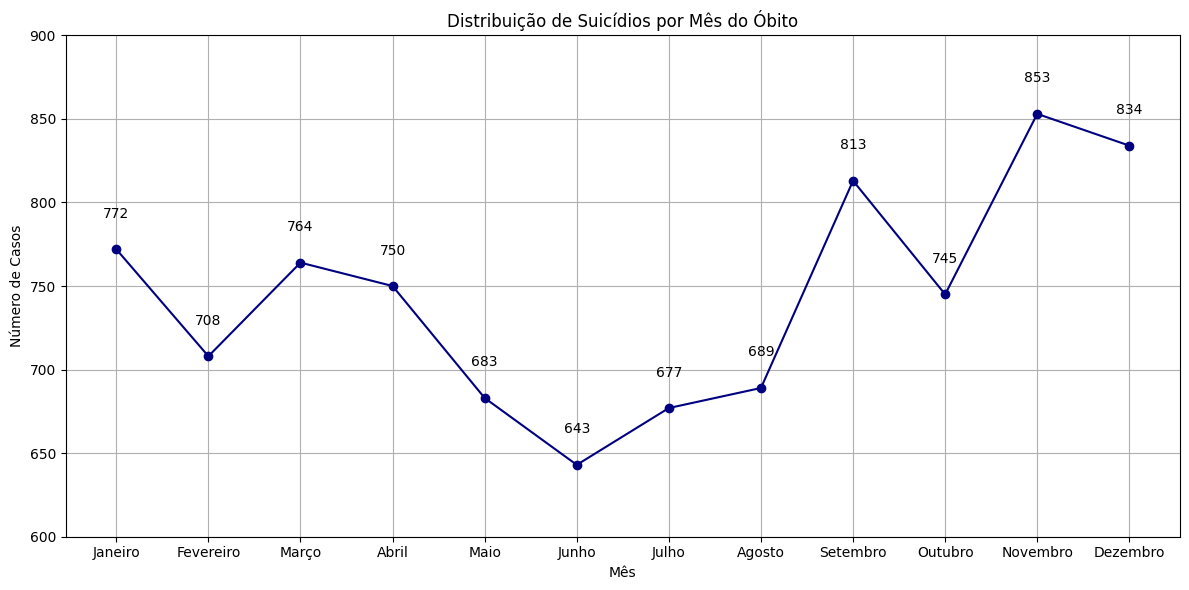

In [168]:
rotulos_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho','Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']    
soma_mes = df_mes.sum() 

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(rotulos_meses, soma_mes, marker='o', linestyle='-', color='navy')
plt.title('Distribuição de Suicídios por Mês do Óbito')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.grid(True)
# Ajustando o limite superior do eixo Y
plt.ylim(600, 900)

# Adicionando valores no topo dos pontos
for i, valor in enumerate(soma_mes):
    plt.text(i, valor + (0.02 * soma_mes.max()), f'{int(valor)}', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Avaliação Estatistica    

In [169]:
# Separando dados por mês
janeiro = df['Mes_obito_Janeiro']
fevereiro = df['Mes_obito_Fevereiro']
marco = df['Mes_obito_Março']
abril = df['Mes_obito_Abril']
maio = df['Mes_obito_Maio']
junho = df['Mes_obito_Junho']
julho = df['Mes_obito_Julho']
agosto = df['Mes_obito_Agosto']
setembro = df['Mes_obito_Setembro']
outubro = df['Mes_obito_Outubro']
novembro = df['Mes_obito_Novembro']
dezembro = df['Mes_obito_Dezembro']

# Realizando o teste krushal-wallis
stat, p_valor = kruskal(janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro)

# Resultados
print(f'Estatística de Kruskal-Wallis: {stat:.4f}, p-valor: {p_valor:.4f}')
if p_valor < 0.05:
    print("Há diferenças significativas entre os meses.")
else:
    print("Não há diferenças significativas entre os meses.")

    

Estatística de Kruskal-Wallis: 16.2155, p-valor: 0.1333
Não há diferenças significativas entre os meses.


## Avaliação Anual

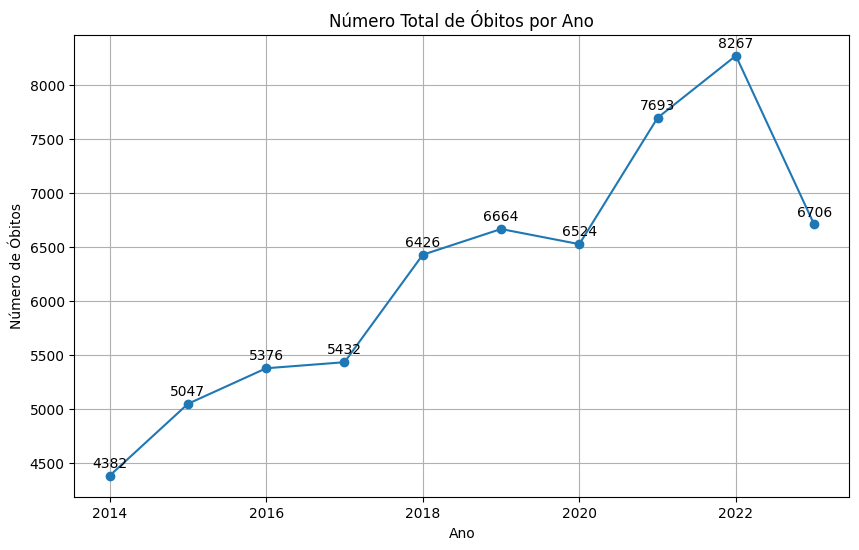

In [170]:
# Somar os valores de todas as colunas de óbitos para cada ano
df['Total_Obitos'] = df.iloc[:, 1:].sum(axis=1)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['ano'], df['Total_Obitos'], marker='o')
plt.title('Número Total de Óbitos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Óbitos')
plt.grid(True)
#adicionando valores de total de obitos por ano
for i, valor in enumerate(df['Total_Obitos']):
    plt.text(df['ano'][i], valor + 50, f'{int(valor)}', ha='center', va='bottom', fontsize=10)
plt.show()

## Tendências anuais

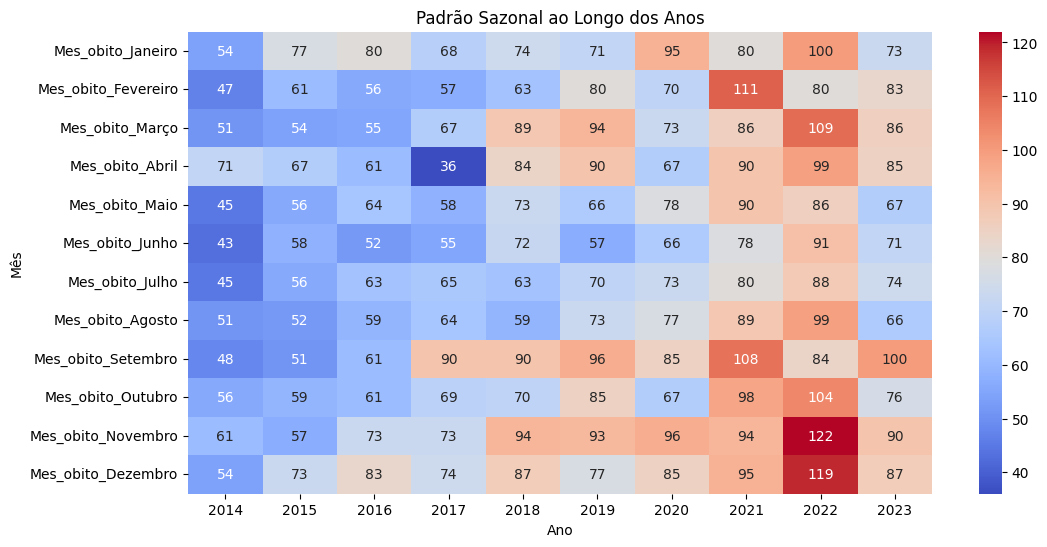

In [172]:
import seaborn as sns

# Pivotar meses para analisar tendências anuais
df_mes_anos = df_mes.copy()
df_mes_anos["Ano"] = df["ano"]
df_mes_anos = df_mes_anos.groupby("Ano").sum()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_mes_anos.T, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Padrão Sazonal ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Mês")
plt.show()


## Clusterização


O Processo de Clusterização é uma técnica de aprendizado não supervisionado que agrupa dados semelhantes em clusters, de forma que os grupos que estão no mesmo cluster são mais parecidos entre si do que os outros agrupados nos demais clusters. O algoritmo KMeans é um dos mais populares para clusterização.


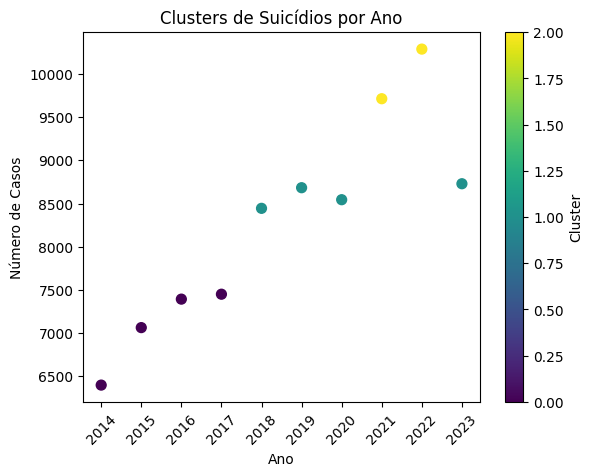

In [76]:
# Selecionar todas as colunas para a avaliação
variaveis_completas = df.select_dtypes(include=[np.number])

# Normalizar os dados
scaler = StandardScaler()
variaveis_normalizadas_completas = scaler.fit_transform(variaveis_completas)

# Aplicar K-Means
kmeans_completo = KMeans(n_clusters=3, random_state=None)
df["Cluster_Completo"] = kmeans_completo.fit_predict(variaveis_normalizadas_completas)

# Visualizar os clusters
plt.scatter(df["ano"], df["Total_Obito"], c=df["Cluster_Completo"], cmap="viridis", s=50)
plt.title("Clusters de Suicídios por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Casos")
plt.colorbar(label="Cluster")
# Ajustar os ticks do eixo X para mostrar todos os anos
plt.xticks(ticks=df["ano"], labels=df["ano"], rotation=45)
plt.show()

Conforme a análise, foi formado três grupos, um de 2014-2017 sendo mais parecidos entre si que os demais. Já o segundo grupo formado com os anos de 2018, 2019, 2020 e 2023;  Destaca-se a formação de um grupo a parte dos anos de 2021 e 2022, potencialmente relacionados a pandemia de covid-19